## 平均値/中央値のインピュテーション

インピュテーションとは，欠落したデータを欠落値の統計的な推定値で置き換えることである．すべてのインピュテーション技術の目的は，機械学習モデルの学習に使用できる**完全なデータセット**を作成することである．

平均値/中央値のインピュテーションは、変数内で発生したすべての欠損値（NA）を平均値（変数がガウス分布の場合）または中央値（変数が歪んだ分布の場合）に置き換えることで構成されます。

**以下の点に注意してください。

- 変数が正規分布の場合，平均値，中央値，最頻値はほぼ同じである。したがって，欠損値を平均値と中央値で置き換えることは同等である。欠損値を最頻値で置き換えることは、数値変数では一般的ではありません。
- 変数が歪んでいる場合、平均値は分布の端の値によって偏ってしまいます。したがって、中央値の方が変数の大部分の値をよりよく表しています。
- メモリを節約するために'int'にキャストされた離散的な変数の場合、平均値は整数ではないので、変数全体が'float'に再キャストされます。この挙動を回避するために、NAを中央値に置き換えることができます。中央値も必然的に整数/離散値となります。


### 平均値/中央値インピュテーションでは、どのような変数をインピュテーションできますか?

平均値と中央値は数値変数でのみ計算できますので、これらの方法は連続および離散の数値変数にのみ適しています。


### 前提条件

- データは完全に無作為に欠損している (MCAR)
- 欠損したオブザベーションは、ほとんどの場合、その変数のオブザベーションの大部分に似ている (つまり、平均値/中央値)

データが完全に無作為に欠落している場合、欠落している値は、分布の平均値や中央値に非常に近い値になると考えてよいでしょう（これらの値は、最も頻度の高い/平均的な観測値を表します）。


### メリット

- 実装が簡単
- 完全なデータセットを迅速に得ることができる
- モデル展開時に生産現場に組み込むことができる

### 制限事項

- 元の変数分布の歪み
- 元の分散の歪み
- データセットの残りの変数との共分散の歪み

NAを平均値や中央値に置き換えた場合、NAの数がオブザベーションの総数に対して多いと、変数の分散が歪んでしまい、分散の過小評価につながります。

さらに，データセット内の他の変数との共分散や相関の推定値も影響を受ける可能性がある．平均値/中央値インピュテーションは，欠損データを置き換える平均値/中央値が，残りの変数との関係を必ずしも維持しないので，本質的な相関を変化させる可能性がある．

最後に、すべての欠損値を平均値/中央値に集中させると、分布の中でよく見られるオブザベーションが外れ値として拾われてしまう可能性があります。


### 平均値/中央値インピュテーションを使う場合は？

- データが完全に無作為に欠損している
- 欠損データが変数の5%以下の場合

理論的には、この推定法の影響を最小限にするためには、上記の条件を満たす必要がありますが、実際には、データがMCARではなく、多くの欠落値がある場合でも、平均値/中央値推定法が非常によく使われています。その理由は，この手法が単純であるからです。


### 最終注意

NA値の平均値/中央値への置き換えは、データサイエンスのコミュニティや様々なデータサイエンスコンテストで広く使われています。例えば、KDD2009カップの優勝ソリューションをご覧ください。[Winning the KDD Cup Orange Challenge with Ensemble Selection"]( http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf )を参照してください。

一般的に、平均値/中央値のインピュテーションは、データが欠落しているオブザベーションを捕捉するために、バイナリの「欠落インジケータ」変数を追加して行われます（講義「欠落インジケータ」を参照）。どちらの方法も非常に簡単に実装できるため、データサイエンスのコンテストではトップの選択肢となります。

## このデモでは

Ames House PriceとTitanicのデータセットでpandasを使って平均値と中央値のインピュテーションを行う方法を学習します。

- データセットをダウンロードするには、このコースの**セクション1**にある**データセット**の講義を参照してください。



In [61]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# データセットを分割する
from sklearn.model_selection import train_test_split

## タイタニック

In [62]:
# デモのためにいくつかの変数を使ってTitanicデータセットを読み込む

data = pd.read_csv('/content/drive/MyDrive/特徴量工学/Section-04-Missing-Data-Imputation/titanic.csv', usecols=['age', 'fare', 'survived'])
data.head()

,survived,age,fare
0,1,29,211.3375
1,1,0.9167,151.55
2,0,2,151.55
3,0,30,151.55
4,0,25,151.55


In [63]:
data

,survived,age,fare
0,1,29,211.3375
1,1,0.9167,151.55
2,0,2,151.55
3,0,30,151.55
4,0,25,151.55
...,...,...,...
1304,0,14.5,14.4542
1305,0,?,14.4542
1306,0,26.5,7.225
1307,0,27,7.225


In [64]:
data=data[(~data['age'].str.contains('?', regex=False))&(
data['fare'].str.contains('?', regex=False).sum())]

In [65]:
# NAの割合を見てみよう

data.isnull().mean()

survived    0.0
age         0.0
fare        0.0
dtype: float64

In [66]:

data

,survived,age,fare
0,1,29,211.3375
1,1,0.9167,151.55
2,0,2,151.55
3,0,30,151.55
4,0,25,151.55
...,...,...,...
1301,0,45.5,7.225
1304,0,14.5,14.4542
1306,0,26.5,7.225
1307,0,27,7.225


欠損データのある変数はAgeのみで、約20%の欠損があります。

### インピュテーションの重要性

インピュテーションはトレーニングセットで行われ、テストセットに伝搬されます。つまり、訓練セットとテストセットの両方で欠損値を埋めるために使用される平均値/中央値は、訓練セットのみから抽出する必要があります。これは、オーバーフィッティングを避けるためです。

In [67]:

# トレーニングセットとテストセットに分けてみましょう

X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']], # 予測因子
    data['survived'], #ターゲット
    test_size=0.3, # テストセットに含まれるオブの割合
    random_state=0) # 再現性を確保するためのシード

X_train.shape, X_test.shape


((732, 2), (314, 2))

In [68]:
# トレーニングセットの欠損データを調べてみよう
# パーセンテージは、データセット全体のものとかなり似ているはずだ
# 全データセットの

X_train.isnull().mean()

age     0.0
fare    0.0
dtype: float64

In [83]:
# 欠損値を平均値や中央値で埋める関数を作ってみましょう。
# the variableは、データフレーム、変数、平均値または中央値の値を受け取ります。
# 平均値または中央値
# 埋められた値を持つ変数を返す



def impute_na(df, variable, mean_median):

    return df[variable].fillna(mean_median)

In [70]:

X_train

,age,fare
728,43,8.05
1308,29,7.875
195,16,86.5
763,0.1667,20.575
415,34,13
...,...,...
1289,21,6.4958
846,20,9.5
952,22,7.775
614,26,7.8875


In [71]:
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN
X_train.age.map(lambda x: float(Decimal(str(x)).quantize(Decimal('0'), rounding=ROUND_HALF_UP)))

728     43.0
1308    29.0
195     16.0
763      0.0
415     34.0
        ... 
1289    21.0
846     20.0
952     22.0
614     26.0
745     30.0
Name: age, Length: 732, dtype: float64

In [74]:
# 平均値を計算する 年齢

# mean = X_train.age.mean()
mean=X_train.age.astype(np.float64).mean()
mean

30.257513661202186

In [78]:

X_train['Age_mean']

728         43
1308        29
195         16
763     0.1667
415         34
         ...  
1289        21
846         20
952         22
614         26
745         30
Name: Age_mean, Length: 732, dtype: object

In [79]:

# 欠損値を置き換えた新しい変数を作成します。
# 上記で作成した関数を使用して

# 最初に中央値に置き換える
X_train['Age_median'] = impute_na(X_train, 'age', median)

# 次に，平均値に置き換えます
X_train['Age_mean'] = impute_na(X_train, 'age', mean)

# 平均値には多くの小数が含まれるので，1に丸めます．
# numpyのround関数を使用
# X_train['Age_mean'] = np.round(X_train['Age_mean'], 1)
X_train['Age_mean'] = X_train['Age_mean'].astype(np.float64)
X_train['Age_mean'] = np.round(X_train['Age_mean'], 1)


X_train.head(15)

,age,fare,Age_median,Age_mean
728,43,8.05,43,43.0
1308,29,7.875,29,29.0
195,16,86.5,16,16.0
763,0.1667,20.575,0.1667,0.2
415,34,13,34,34.0
1201,22,7.2292,22,22.0
514,2,26,2,2.0
1148,35,7.125,35,35.0
911,21,8.4333,21,21.0
42,59,51.4792,59,59.0


Ageに欠損データ（NaN）がある行を見て、新しい変数でそれらが28（中央値）または30（平均値）に置き換えられていることを確認してください。


In [85]:
# mean / median imputation の後、分散に変化が見られます。
# これは、データ欠損の割合が非常に高いことから予想されます。
# 欠損率が非常に高いからです。

X_train['age'] = X_train['age'].astype(np.float64)
X_train['Age_median'] = X_train['Age_median'].astype(np.float64)

print('Original variable variance: ', X_train['age'].var())
print('Variance after median imputation: ', X_train['Age_median'].var())
print('Variance after mean imputation: ', X_train['Age_mean'].var())

Original variable variance:  199.69332391302783
Variance after median imputation:  199.69332391302783
Variance after mean imputation:  199.68523551090294


予想通り，分散は過小評価されています．なぜなら，多くの値が平均値または中央値のどちらかと同じだからです．

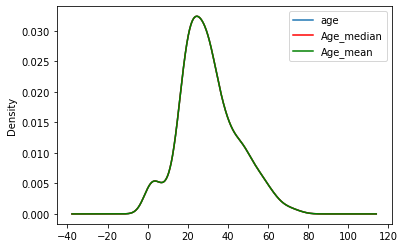

In [86]:

# 分布が変化したことがわかります 
# より多くの値が中央値に向かって蓄積されるようになりました
# または中央値

fig = plt.figure()
ax = fig.add_subplot(111)

# 元の変数の分布
X_train['age'].plot(kind='kde', ax=ax)

# 中央値でインピュートされた変数
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# 平均値でインピュートされた変数
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# 凡例の追加
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')




上述したように，平均値/中央値インピュテーションは，変数 Age の元の分布を歪めてしまいます．変換された変数は、平均値や中央値の周辺に多くの値を示しています。

**これは重要なのでしょうか？

これは、構築したい機械学習モデルによります。線形モデルは、変数が正規分布していることを前提としています。欠損データの割合が高い場合、平均値/中央値のインピュテーションは元の正規分布を歪める可能性があります。そのため、最終的に入力された変数は正規分布ではなくなり、線形モデルのパフォーマンスに影響を与える可能性があります。


In [87]:

# また，平均値/中央値のインピュテーションは，データの他の変数との関係に # 影響を与える可能性があると述べました．
# データセット内の他の変数との関係に影響を与えるかもしれないと言いましたが，見てみましょう．

X_train[['fare', 'age', 'Age_median', 'Age_mean']].cov()

,age,Age_median,Age_mean
age,199.693324,199.693324,199.689272
Age_median,199.693324,199.693324,199.689272
Age_mean,199.689272,199.689272,199.685236


平均値/中央値インピュテーションの後、年齢とFareの共分散が変化していることがわかります。

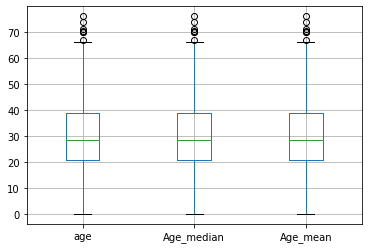

In [88]:
# 最後に，mean/median imputation は，オブザベーションが正常であったり 
# 正常なオブザベーションが外れ値のように見えることがあると述べた．

# 言い換えれば，平均値/中央値のインピュテーションは，見かけ上の外れ値の数を # 増加させるかもしれない．
# in the apparent number of outliers

# 箱ひげ図を使って調べてみよう
X_train[['age', 'Age_median', 'Age_mean']].boxplot()

上のボックスプロットから、インピュテーションの後、年齢の高い値に外れ値が増えただけでなく、年齢の低い値にも外れ値が増えていることがわかります。

**これは重要なことでしょうか？

真の外れ値を求めているのであれば，この挙動を念頭に置いて，帰納法によって人工的な外れ値をマスクしたり作成したりしていないことを確認する必要があります．実際には，通常，この挙動をチェックすることはありません．しかし、このようなことが起きていることを知っておくことは重要だと思います。

## House Prices Dataset

家屋価格のデータセットでこの作業を繰り返してみましょう。このデータセットでは、欠損データが多いまたは少ない変数があります。そのため，両方のシナリオで，平均値/中央値インピュテーションの効果を比較することができます。


In [89]:

# 以下の変数のみを使用します。
# そのうち3つはNAを含みます



cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [95]:
# House Prices データセットをロードしましょう

data = pd.read_csv('/content/drive/MyDrive/特徴量工学/Section-04-Missing-Data-Imputation/HousePrice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [96]:
# 欠損データを含む変数を表示する

# 次のリスト comprehensionでは、データセットのすべての列をループして
# データセットのすべての列をループして 欠損データを含むものを選択する


[var for var in data.columns if data[var].isnull().sum() > 0]

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [97]:
# 欠落データの割合を調べる
# セクション3の変数の特徴で学んだのと同じコードです。


data[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64

**NAを置き換えるために使用する平均値と中央値は、トレーニングセットで計算され、テストセットに伝達される必要があることを覚えておいてください。

In [98]:
# トレーニングセットとテストセットに分けてみましょう

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 10), (438, 10))

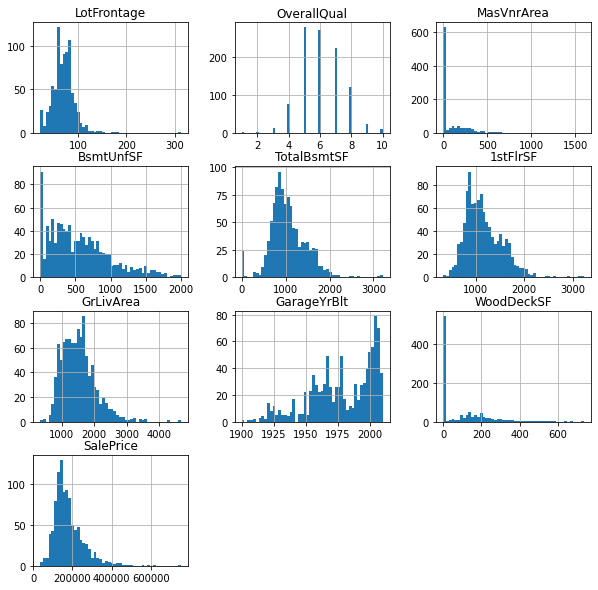

In [99]:

# 変数の分布をプロットしてみよう
# このコードはセクション3の変数の特徴で学びました

X_train.hist(bins=50, figsize=(10,10))
plt.show()

In [100]:

# 欠損値を置き換えた新しい変数を作成します
# 上記で作成した関数を使って中央値に置き換えた新しい変数を作成します。

# 次の行をそれぞれの変数に対してNAで繰り返します。
# 次のセルまでに

median = X_train['LotFrontage'].median()

X_train.loc[:,'LotFrontage_median'] = impute_na(X_train, 'LotFrontage', median)
X_test.loc[:,'LotFrontage_median'] = impute_na(X_test, 'LotFrontage', median)

In [101]:
median = X_train['MasVnrArea'].median()

X_train.loc[:,'MasVnrArea_median'] = impute_na(X_train, 'MasVnrArea', median)
X_test.loc[:,'MasVnrArea_median'] = impute_na(X_test, 'MasVnrArea', median)

In [102]:
median = X_train['GarageYrBlt'].median()

X_train.loc[:, 'GarageYrBlt_median'] = impute_na(X_train, 'GarageYrBlt', median)
X_test.loc[:,'GarageYrBlt_median'] = impute_na(X_test, 'GarageYrBlt', median)

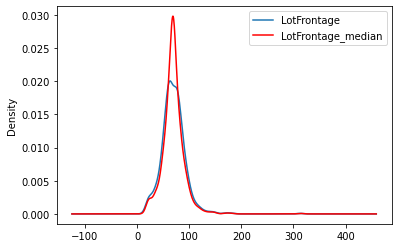

In [103]:

# 中央値インピュテーションの分布への影響を評価してみましょう

# LotFrontAgeの分布が変化していることがわかります。
# より多くの値が中央値に向かって蓄積されていることがわかります

fig = plt.figure()
ax = fig.add_subplot(111)

# 元の変数の分布
X_train['LotFrontage'].plot(kind='kde', ax=ax)

# 中央値でインピュートされた変数
X_train['LotFrontage_median'].plot(kind='kde', ax=ax, color='red')

# 凡例の追加
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


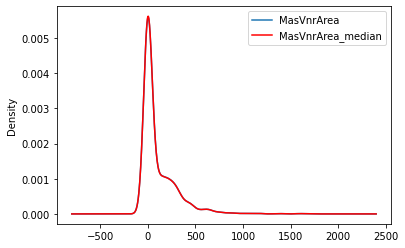

In [104]:
# MasVnrAreaについては，欠損データの割合が少ないので
# 欠落データの割合が低かったため，変数の元の分布が劇的に変化するとは思わず， # 予測もしていません．
# 劇的な変化は見られません。

fig = plt.figure()
ax = fig.add_subplot(111)

# 元の変数の分布
X_train['MasVnrArea'].plot(kind='kde', ax=ax)

# 中央値でインピュートされた変数
X_train['MasVnrArea_median'].plot(kind='kde', ax=ax, color='red')

# 凡例の追加
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


In [113]:

X_train[['GarageYrBlt', 'GarageYrBlt_median']]

,GarageYrBlt,GarageYrBlt_median
64,1998.0,1998.0
682,1996.0,1996.0
960,NaN,1979.0
1384,1939.0,1939.0
1100,1930.0,1930.0
...,...,...
763,1999.0,1999.0
835,1996.0,1996.0
1216,1978.0,1978.0
559,2003.0,2003.0


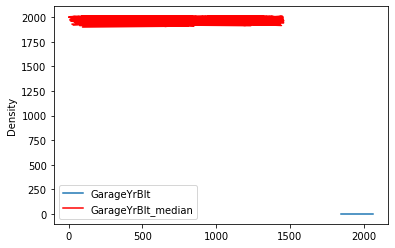

In [114]:
# 同様に，GarageBlt の場合，欠損データの割合が少ないため， # 凡例を追加しません．
# 欠落データの割合が低いため，元の変数の分布に大きな変化はないと考えられます．
# しかし、中央値付近の値が多くなっています。
# 中央値付近の値

fig = plt.figure()
ax = fig.add_subplot(111)

# 元の変数の分布
X_train['GarageYrBlt'].plot(kind='kde', ax=ax)

# 中央値でインピュートされた変数

X_train['GarageYrBlt_median'] = X_train['GarageYrBlt_median'].astype(np.float64)j
X_train['GarageYrBlt_median'].plot(kinds='kde', ax=ax, color='red')

# 凡例の追加
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


In [ ]:


X_train

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice,LotFrontage_median,MasVnrArea_median,GarageYrBlt_median
64,NaN,7,573.0,318,1057,1057,2034,1998.0,576,219500,69.0,573.0,1998.0
682,NaN,6,0.0,288,1291,1291,1291,1996.0,307,173000,69.0,0.0,1996.0
960,50.0,5,0.0,162,858,858,858,NaN,117,116500,50.0,0.0,1979.0
1384,60.0,6,0.0,356,560,698,1258,1939.0,0,105000,60.0,0.0,1939.0
1100,60.0,2,0.0,0,290,438,438,1930.0,0,60000,60.0,0.0,1930.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,82.0,8,673.0,89,1252,1268,2365,1999.0,0,337000,82.0,673.0,1999.0
835,60.0,4,0.0,625,1067,1067,1067,1996.0,290,128000,60.0,0.0,1996.0
1216,68.0,6,0.0,0,0,1318,1902,1978.0,0,112000,68.0,0.0,1978.0
559,NaN,7,18.0,1374,1374,1557,1557,2003.0,143,234000,69.0,18.0,2003.0


In [115]:
# 同様に，インピュテーション技術が以下に与える影響を調べることができます．
# 分散

# LotFrontAgeのインピュテーション後の分散の変化を見ることができます。
# これは，欠損データの割合が非常に高いことから予想される．
# 高い #20%


print('Original Variance: ', X_train['LotFrontage'].var())
print('Variance after median imputation: ', X_train['LotFrontage_median'].var())

Original Variance:  532.5872021885676
Variance after median imputation:  434.06604265416564


In [116]:

# MasnVnrAreaについては，欠損データの割合が小さかったため，このような結果にはなりませんでした．

print('Original Variance: ', X_train['MasVnrArea'].var())
print('Variance after median imputation: ', X_train['MasVnrArea_median'].var())

Original Variance:  32983.538710039466
Variance after median imputation:  32874.27007404175


In [117]:

# GarageBltの場合は、欠損率が小さかったので、分散への影響は
# 分散への影響も小さい

print('Original Variance: ', X_train['GarageYrBlt'].var())
print('Variance after median imputation: ', X_train['GarageYrBlt_median'].var())

Original Variance:  624.3059475074134
Variance after median imputation:  591.3356883144767


In [118]:
# 最後に、共分散を調べてみましょう。
# 下の表の値をじっくりと比較してみてください。
# LotFrontAgeでは共分散に影響があるが、他の2つの変数ではあまり影響がないことがわかる。
# 他の2つの変数ではあまり影響を受けていないことがわかる

X_train.cov()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice,LotFrontage_median,MasVnrArea_median,GarageYrBlt_median
LotFrontage,532.587202,6.587119,6.805603e+02,9.496573e+02,2.908856e+03,3.379794e+03,3.919952e+03,30.611717,1.347414e+02,6.689645e+05,532.587202,6.744233e+02,28.095264
OverallQual,6.587119,1.843859,1.014970e+02,1.746147e+02,2.886241e+02,2.242973e+02,4.091242e+02,17.902809,3.168557e+01,8.320132e+04,5.384774,1.005330e+02,16.875386
MasVnrArea,680.560330,101.496976,3.298354e+04,7.540788e+03,2.478877e+04,2.086595e+04,3.520785e+04,1203.583792,3.208924e+03,6.836439e+06,553.921303,3.298354e+04,1134.380889
BsmtUnfSF,949.657293,174.614725,7.540788e+03,1.875241e+05,7.513307e+04,4.987449e+04,5.203392e+04,1823.065167,-1.833201e+03,6.833028e+06,788.095358,7.472110e+03,1724.141544
TotalBsmtSF,2908.855504,288.624075,2.478877e+04,7.513307e+04,1.682931e+05,1.212079e+05,8.615192e+04,3173.042442,1.227966e+04,2.003928e+07,2370.929189,2.465436e+04,2989.473391
1stFlrSF,3379.793504,224.297266,2.086595e+04,4.987449e+04,1.212079e+05,1.398656e+05,1.044401e+05,2009.195552,1.109406e+04,1.783631e+07,2750.747094,2.080136e+04,1890.271636
GrLivArea,3919.951834,409.124216,3.520785e+04,5.203392e+04,8.615192e+04,1.044401e+05,2.681277e+05,2738.982988,1.558395e+04,2.934477e+07,3189.685753,3.496714e+04,2576.345636
GarageYrBlt,30.611717,17.902809,1.203584e+03,1.823065e+03,3.173042e+03,2.009196e+03,2.738983e+03,624.305948,6.658911e+02,9.309355e+05,24.755173,1.182673e+03,624.305948
WoodDeckSF,134.741376,31.685571,3.208924e+03,-1.833201e+03,1.227966e+04,1.109406e+04,1.558395e+04,665.891118,1.648582e+04,3.029981e+06,106.009105,3.212101e+03,627.624634
SalePrice,668964.454191,83201.317781,6.836439e+06,6.833028e+06,2.003928e+07,1.783631e+07,2.934477e+07,930935.489321,3.029981e+06,6.105731e+09,544838.836893,6.790442e+06,877485.418108


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


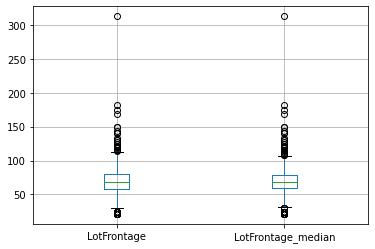

In [119]:

# 最後に、外れ値への影響を調べてみましょう

# LotFrontageでは、外れ値の境界線が減少しています。
# (上端のウィスカーの高さを見てください)
# しかし、他の2つの変数には目に見える効果はない

X_train[['LotFrontage', 'LotFrontage_median']].boxplot()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


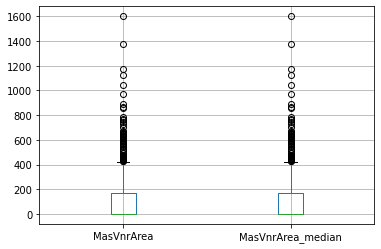

In [120]:
X_train[['MasVnrArea', 'MasVnrArea_median']].boxplot()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


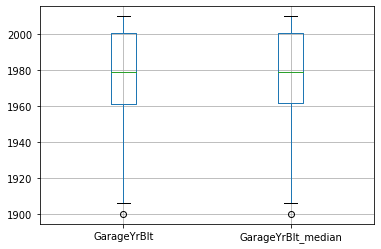

In [121]:
X_train[['GarageYrBlt', 'GarageYrBlt_median']].boxplot()


**このデモは以上です**。

このセクションの最後に、オープンソースのPythonパッケージを使って、機械学習モデルのパイプラインの一部として、平均値/中央値のインピュテーションを行う方法を紹介します。

